In [ ]:
#Prog. 1 : Create a multiple linear regression model for house price dataset divide 
#dataset into train and test data while giving it to model and predict prices of house

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("boston_houses.csv")

# Feature & Target
X = df[['RM']]
y = df['Price']

# Make sure at least 2 samples in test set
test_size = max(2 / len(df), 0.2)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Train model
model = LinearRegression().fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")

if len(y_test) > 1:
    r2 = r2_score(y_test, y_pred)
    print(f"R²: {r2:.2f}")
else:
    print("R²: Not defined (only one sample in test set)")

# Sample results
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}))


MSE: 2834.42
R²: 0.45
   Actual   Predicted
1     599  525.439347
4     455  438.947900


In [ ]:
#Prog. 3 Fit the simple linear regression and polynomial linear regression models to
# Salary_positions.csv data. Find which one is more accurately fitting to the given data.
# Also predict the salaries of level 11 and level 12 employees

R² Linear: 0.8788
R² Polynomial: 1.0000
Polynomial fits better!
Predicted Salary (Level 11): $106,190,000.00
Predicted Salary (Level 12): $174,420,000.00


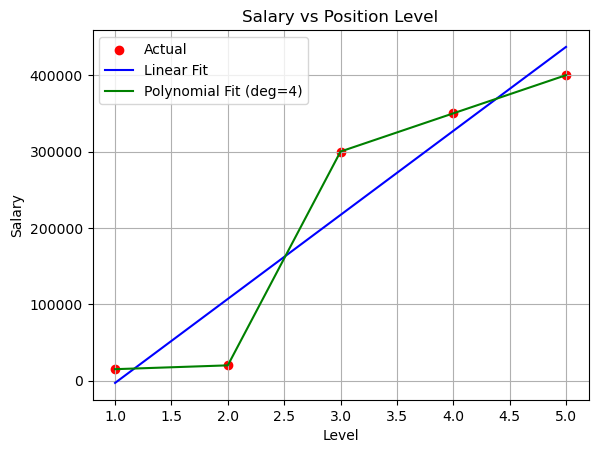

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# 1. Load dataset
df = pd.read_csv('Salary_positions.csv')
X = df[['Level']].values      # Position Level
y = df['Salary'].values       # Salary

# 2. Simple Linear Regression
lin_model = LinearRegression()
lin_model.fit(X, y)
r2_linear = r2_score(y, lin_model.predict(X))

# 3. Polynomial Regression (degree 4)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
r2_poly = r2_score(y, poly_model.predict(X_poly))

# 4. Compare accuracy
print(f"R² Linear: {r2_linear:.4f}")
print(f"R² Polynomial: {r2_poly:.4f}")
print("Polynomial fits better!" if r2_poly > r2_linear else "Linear fits better!")

# 5. Predict salaries for Levels 11 and 12
for level in [11, 12]:
    salary = poly_model.predict(poly.transform([[level]]))[0]
    print(f"Predicted Salary (Level {level}): ${salary:,.2f}")

# 6. Visualize results
plt.scatter(X, y, color='red', label='Actual')
plt.plot(X, lin_model.predict(X), color='blue', label='Linear Fit')
plt.plot(X, poly_model.predict(X_poly), color='green', label='Polynomial Fit (deg=4)')
plt.title('Salary vs Position Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
##Prog. 4 Write a python program to categorize the given news text into one of the 
##available 20  categories of news groups, using multinomial Naïve Bayes machine 
##learning model

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
newsgroups = fetch_20newsgroups(subset='all')

# Vectorize the text
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy & classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=newsgroups.target_names))

# Test on new text
news_text = ["The stock market is seeing a significant increase in prices due to new regulations."]
news_text_transformed = vectorizer.transform(news_text)
predicted_category = model.predict(news_text_transformed)
predicted_category_name = newsgroups.target_names[predicted_category[0]]
print(f"Predicted Category: {predicted_category_name}")


Accuracy: 0.8777
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.85      0.85      0.85       151
           comp.graphics       0.88      0.84      0.86       202
 comp.os.ms-windows.misc       0.86      0.85      0.85       195
comp.sys.ibm.pc.hardware       0.64      0.85      0.73       183
   comp.sys.mac.hardware       0.94      0.87      0.90       205
          comp.windows.x       0.95      0.85      0.90       215
            misc.forsale       0.93      0.72      0.81       193
               rec.autos       0.91      0.94      0.92       196
         rec.motorcycles       0.89      0.95      0.92       168
      rec.sport.baseball       0.95      0.95      0.95       211
        rec.sport.hockey       0.90      0.99      0.94       198
               sci.crypt       0.91      0.97      0.93       201
         sci.electronics       0.92      0.82      0.86       202
                 sci.med       0.9

In [ ]:
#Prog. 5 Implement Ridge Regression, Lasso regression, ElasticNet model using
# boston_houses.csv and take only ‘RM’ and ‘Price’ of the houses. divide the data as 
#training and testing data. Fit line using Ridge regression and to find price of a house 
#ifit contains 5 rooms. and compare results.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

try:
    from sklearn.datasets import load_boston
    boston = load_boston()
    df = pd.DataFrame(boston.data, columns=boston.feature_names)
    df['Price'] = boston.target
except:
    df = pd.read_csv('boston_houses.csv').rename(columns={'MEDV': 'Price'})

# Features & target
X = df[['RM']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to evaluate
models = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

# Train, predict, and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    mse = mean_squared_error(y_test, model.predict(X_test))
    print(f"{name} MSE: {mse:.2f}")

# Example prediction with Ridge (keeping feature name to avoid warning)
pred_input = pd.DataFrame({'RM': [5]})  # keep same column name as training data
pred = models["Ridge"].predict(pred_input)[0]
print(f"Predicted price for 5 rooms (Ridge): ${pred*1000:.2f}")

Ridge MSE: 3973.34
Lasso MSE: 4545.60
ElasticNet MSE: 4418.73
Predicted price for 5 rooms (Ridge): $424986.38


In [ ]:
#Prog. 6 Write a python program to Implement Decision Tree classifier model onData 
#which is extracted from images that were taken from genuine and forged banknote
#like specimens. (refer UCI dataset https://archive.ics.uci.edu/dataset/267/banknote+authentication)

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('boston_houses.csv').rename(columns={'MEDV': 'Price'})

# Features & target
X = df[['RM']]  # Average number of rooms per dwelling
y = df['Price']  # Median house price

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define models
models = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

# Train, evaluate, and display results
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"{name} MSE: {mse:.2f}")

    # Example prediction for Ridge model
    if name == "Ridge":
        new_data = pd.DataFrame({'RM': [5]})  # Keep column name same
        predicted_price = model.predict(new_data)[0]
        print(f"Predicted price for 5 rooms ({name}): ${predicted_price * 1000:.2f}")


Ridge MSE: 3973.34
Predicted price for 5 rooms (Ridge): $424986.38
Lasso MSE: 4545.60
ElasticNet MSE: 4418.73


In [ ]:
#Prog. 7 Classify the iris flowers dataset using SVM and find out the flower type 
#depending on the given input data like sepal length, sepal width, petal length and petal width Find accuracy of all SVM kernels.

In [12]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X, y = iris.data, iris.target  # X = features, y = species labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = {}

for k in kernels:
    model = SVC(kernel=k, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    accuracies[k] = acc
    print(f"{k} kernel → Accuracy: {acc:.4f}")

best_kernel = max(accuracies, key=accuracies.get)
print(f"\n Best kernel: {best_kernel} ({accuracies[best_kernel]:.4f})")

final_model = SVC(kernel=best_kernel, random_state=42).fit(X, y)
new_data = [[5.1, 3.5, 1.4, 0.2]]  # Example measurements
predicted_species = iris.target_names[final_model.predict(new_data)[0]]
print(f"\nNew Flower: {new_data[0]} → Predicted Species: {predicted_species}")


linear kernel → Accuracy: 1.0000
poly kernel → Accuracy: 0.9778
rbf kernel → Accuracy: 1.0000
sigmoid kernel → Accuracy: 0.2222

 Best kernel: linear (1.0000)

New Flower: [5.1, 3.5, 1.4, 0.2] → Predicted Species: setosa


In [ ]:
#Prog. 9 Implement Non-linear regression model (Decision Tree,SVM,KNN)to predict the consumption of petrol use petrolconsumption 
#dataset.(https://www.kaggle.com/code/ajinkyaa/linear-regression-petrolconsumption) 

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("petrol_consumption.csv")
X, y = df.drop('Petrol_Consumption', axis=1), df['Petrol_Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate(model, Xtr, Xte, name):
    model.fit(Xtr, y_train)
    preds = model.predict(Xte)
    print(f"{name} → MAE: {mean_absolute_error(y_test, preds):.2f}, R²: {r2_score(y_test, preds):.2f}")

# Decision Tree
evaluate(DecisionTreeRegressor(random_state=42), X_train, X_test, "Decision Tree")

# SVR (scaled)
scaler = StandardScaler()
evaluate(SVR(kernel='rbf'), scaler.fit_transform(X_train), scaler.transform(X_test), "SVR")

# KNN
evaluate(KNeighborsRegressor(n_neighbors=5), X_train, X_test, "KNN")


Decision Tree → MAE: 94.30, R²: -1.59
SVR → MAE: 63.10, R²: 0.05
KNN → MAE: 77.44, R²: -0.13


In [ ]:
#Prog. 10 Take iris flower dataset and reduce 4D data to 2D data using PCA. Then 
#train the model and predict new flower with given measurements

In [14]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load and preprocess data
iris = load_iris()
X_scaled = StandardScaler().fit_transform(iris.data)   # Standardize
X_pca = PCA(n_components=2).fit_transform(X_scaled)    # Reduce to 2D

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, iris.target, test_size=0.3, random_state=42)

# Train KNN and evaluate
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
print(f"Model accuracy: {knn.score(X_test, y_test):.2f}")

# Predict new flower
new_data = [[5.1, 3.5, 1.4, 0.2]]
new_pca = PCA(n_components=2).fit(X_scaled).transform(StandardScaler().fit(X_scaled).transform(new_data))
print(f"Prediction: {iris.target_names[knn.predict(new_pca)[0]]}")

Model accuracy: 0.96
Prediction: virginica


In [ ]:
#Prog. 11 Use K-means clustering model and classify the employees into various 
#income groups or clusters. Preprocess data if require (i.e. drop missing or null 
#values). Use elbow method and Silhouette Score to find value of k

C:\Users\saiph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\saiph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\saiph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\saiph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

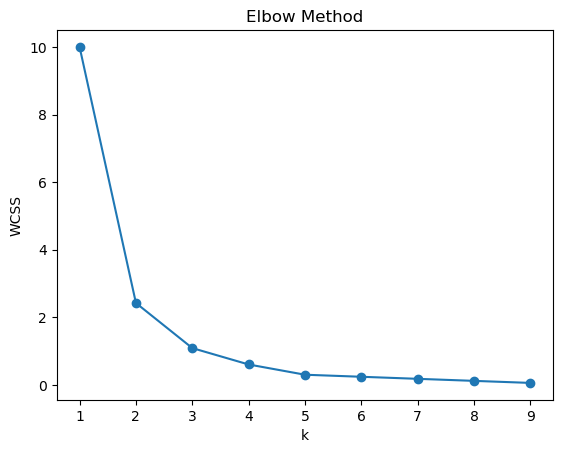

C:\Users\saiph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\saiph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\saiph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\saiph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

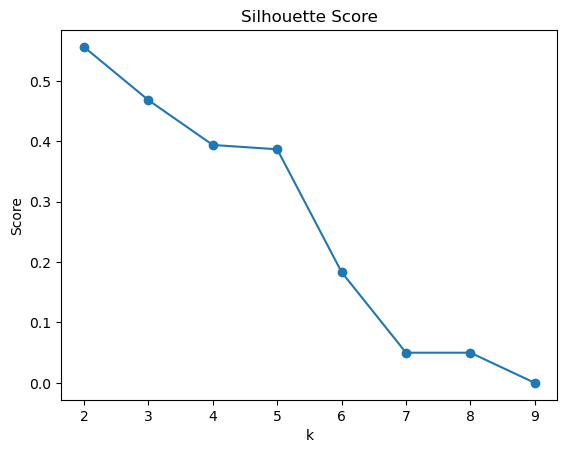

C:\Users\saiph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Income_Group
0     50000.0
2     80000.0
1    115000.0
Name: Income, dtype: float64


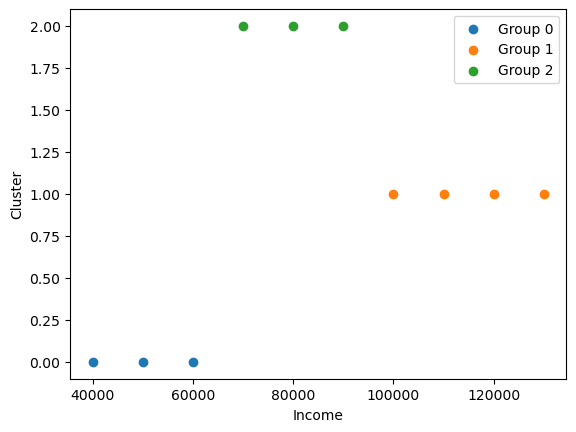

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# ✅ Fix MKL memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"

# Load data
df = pd.read_csv('employee_data.csv').dropna()

# Standardize
X_scaled = StandardScaler().fit_transform(df[['Income']])

# Limit k to avoid silhouette error
max_k = min(10, len(df))

# ✅ Elbow Method (set n_init explicitly to remove FutureWarning)
wcss = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_scaled).inertia_ 
        for k in range(1, max_k)]
plt.plot(range(1, max_k), wcss, marker='o')
plt.title("Elbow Method"); plt.xlabel("k"); plt.ylabel("WCSS"); plt.show()

# ✅ Silhouette Scores
sil_scores = []
for k in range(2, max_k):
    if k < len(df):
        labels = KMeans(n_clusters=k, n_init=10, random_state=42).fit_predict(X_scaled)
        sil_scores.append(silhouette_score(X_scaled, labels))
plt.plot(range(2, max_k), sil_scores, marker='o')
plt.title("Silhouette Score"); plt.xlabel("k"); plt.ylabel("Score"); plt.show()

# Final clustering with chosen k (example: k=3)
k = 3
df['Income_Group'] = KMeans(n_clusters=k, n_init=10, random_state=42).fit_predict(X_scaled)

# Print results
print(df.groupby('Income_Group')['Income'].mean().sort_values())

# Plot clusters
for c in range(k):
    plt.scatter(df[df['Income_Group'] == c]['Income'], [c]*sum(df['Income_Group']==c), label=f'Group {c}')
plt.xlabel("Income"); plt.ylabel("Cluster"); plt.legend(); plt.show()


In [ ]:
#Prog. 13  Use Apriori algorithm on groceries dataset to find which items are brought together.Use minimum support = 0.25

In [19]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Transactions data
data = [
    ['milk', 'bread', 'butter'],
    ['milk', 'sugar'],
    ['bread', 'eggs'],
    ['milk', 'bread', 'eggs'],
    ['butter', 'sugar'],
    ['milk', 'bread', 'butter', 'sugar']
]

# One-hot encode
te = TransactionEncoder()
df = pd.DataFrame(te.fit(data).transform(data), columns=list(te.columns_))

# Find frequent itemsets & association rules
frequent = apriori(df, min_support=0.25, use_colnames=True)
rules = association_rules(frequent, metric="lift", min_threshold=1)

# Display
print("Frequent Itemsets:\n", frequent)
print("\nAssociation Rules:\n", rules)


Frequent Itemsets:
      support               itemsets
0   0.666667                (bread)
1   0.500000               (butter)
2   0.333333                 (eggs)
3   0.666667                 (milk)
4   0.500000                (sugar)
5   0.333333        (bread, butter)
6   0.333333          (bread, eggs)
7   0.500000          (bread, milk)
8   0.333333         (milk, butter)
9   0.333333        (sugar, butter)
10  0.333333          (sugar, milk)
11  0.333333  (bread, milk, butter)

Association Rules:
         antecedents      consequents  antecedent support  consequent support  \
0           (bread)         (butter)            0.666667            0.500000   
1          (butter)          (bread)            0.500000            0.666667   
2           (bread)           (eggs)            0.666667            0.333333   
3            (eggs)          (bread)            0.333333            0.666667   
4           (bread)           (milk)            0.666667            0.666667   
5          

In [ ]:
#Prog. 15 Create a two layered neural network with relu and sigmoid activation function

In [21]:
import numpy as np

sigmoid = lambda x: 1 / (1 + np.exp(-x))
relu = lambda x: np.maximum(0, x)
sigmoid_back = lambda dA, Z: dA * sigmoid(Z) * (1 - sigmoid(Z))
relu_back = lambda dA, Z: dA * (Z > 0)

class TwoLayerNN:
    def __init__(self, in_size, hid_size, out_size, lr=0.01):
        self.W1, self.b1 = np.random.randn(hid_size, in_size) * 0.01, np.zeros((hid_size, 1))
        self.W2, self.b2 = np.random.randn(out_size, hid_size) * 0.01, np.zeros((out_size, 1))
        self.lr = lr

    def forward(self, X):
        Z1, A1 = np.dot(self.W1, X) + self.b1, relu(np.dot(self.W1, X) + self.b1)
        Z2, A2 = np.dot(self.W2, A1) + self.b2, sigmoid(np.dot(self.W2, A1) + self.b2)
        return A2, {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}

    def backward(self, X, Y, cache):
        m = X.shape[1]
        dZ2 = cache["A2"] - Y
        dW2, db2 = np.dot(dZ2, cache["A1"].T) / m, np.sum(dZ2, axis=1, keepdims=True) / m
        dA1 = np.dot(self.W2.T, dZ2)
        dZ1 = relu_back(dA1, cache["Z1"])
        dW1, db1 = np.dot(dZ1, X.T) / m, np.sum(dZ1, axis=1, keepdims=True) / m
        return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

    def update(self, grads):
        for param in ["W1", "b1", "W2", "b2"]:
            setattr(self, param, getattr(self, param) - self.lr * grads["d" + param])

    def train(self, X, Y, iters=1000):
        for i in range(iters):
            A2, cache = self.forward(X)
            grads = self.backward(X, Y, cache)
            self.update(grads)
            if i % 100 == 0:
                cost = -np.mean(Y*np.log(A2)+(1-Y)*np.log(1-A2))
                print(f"Iteration {i}, Cost: {cost:.4f}")

# Example usage
if __name__ == "__main__":
    np.random.seed(1)
    X = np.random.randn(2, 100)
    Y = (X[0] + X[1] > 0).astype(int).reshape(1, -1)
    nn = TwoLayerNN(2, 4, 1, lr=0.1)
    nn.train(X, Y, 2000)
    preds = (nn.forward(X)[0] > 0.5).astype(int)
    print(f"Accuracy: {np.mean(preds == Y) * 100:.2f}%")


Iteration 0, Cost: 0.6931
Iteration 100, Cost: 0.6542
Iteration 200, Cost: 0.3125
Iteration 300, Cost: 0.1414
Iteration 400, Cost: 0.0965
Iteration 500, Cost: 0.0756
Iteration 600, Cost: 0.0631
Iteration 700, Cost: 0.0547
Iteration 800, Cost: 0.0486
Iteration 900, Cost: 0.0440
Iteration 1000, Cost: 0.0402
Iteration 1100, Cost: 0.0372
Iteration 1200, Cost: 0.0347
Iteration 1300, Cost: 0.0326
Iteration 1400, Cost: 0.0307
Iteration 1500, Cost: 0.0292
Iteration 1600, Cost: 0.0278
Iteration 1700, Cost: 0.0265
Iteration 1800, Cost: nan
Iteration 1900, Cost: nan
Accuracy: 99.00%


C:\Users\saiph\AppData\Local\Temp\ipykernel_23996\2390500470.py:38: RuntimeWarning: divide by zero encountered in log
  cost = -np.mean(Y*np.log(A2)+(1-Y)*np.log(1-A2))
C:\Users\saiph\AppData\Local\Temp\ipykernel_23996\2390500470.py:38: RuntimeWarning: invalid value encountered in multiply
  cost = -np.mean(Y*np.log(A2)+(1-Y)*np.log(1-A2))


In [2]:
pip install tensorflow , pip install --upgrade numpy pandas


Note: you may need to restart the kernel to use updated packages.


In [24]:
# Create an ANN and train it on house price dataset classify the house price is above average or below average
!pip install --upgrade --force-reinstall numpy pandas scikit-learn


  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl (12.9 MB)
  Using cached pandas-2.3.1-cp310-cp310-win_amd64.whl (11.3 MB)
     ---------------------------------------- 8.9/8.9 MB 2.6 MB/s eta 0:00:00
     -------------------------------------- 229.9/229.9 kB 7.1 MB/s eta 0:00:00
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
     -------------------------------------- 509.2/509.2 kB 4.6 MB/s eta 0:00:00
  Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
     ---------------------------------------- 41.3/41.3 MB 4.1 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.7
    Uninstalling pytz-2022.7:
      Successfully uninstalled pytz-2022.7
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoo

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
tensorflow-intel 2.17.0 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 2.2.6 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 2.2.6 which is incompatible.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires python-dateutil==2.8.2, but you have python-dateutil 2.9.0.post0 which is incompatible.


In [28]:
# In a new cell, run this first:
!pip install --upgrade pandas numpy scikit-learn

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Sample data
data = {
    'size': [1500, 2000, 2500, None, 3000, 3500, 4000, None],
    'price': [300000, 400000, 500000, 450000, 600000, 700000, 800000, None]
}
df = pd.DataFrame(data).dropna()
X = df[['size']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Predicted House Prices:", y_pred)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
 #Prog.17 Create a CNN model and train it on mnist handwritten digit dataset. Using 
#model find out the digit written by a hand in a given image.
#Import mnist dataset from tensorflow.keras.datasets

In [2]:
import tensorflow as tf
from keras import layers, models, datasets
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST from tf.keras
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))


ModuleNotFoundError: No module named 'tensorflow.python.trackable'

In [ ]:
 ##Q2
 ##Use dataset crash.csv is an accident survivor’s dataset portal for USA hosted
 ##by data.gov. The dataset contains passengers age and speed of vehicle (mph)
 ##at the time of impact and fate of passengers (1 for survived and 0 for not
 ##survived) after a crash. use logistic regression to decide if the age and speed
 ##can predict the survivability of the passengers.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset & drop missing values
df = pd.read_csv("crash.csv").dropna()

# Select features & target
X, y = df[['age', 'speed']], df['survive']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression().fit(X_train, y_train)

# Predictions & evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Predicted:", y_pred)
print("Actual:", y_test.values)


Accuracy: 1.0
Confusion Matrix:
 [[1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Predicted: [0]
Actual: [0]


C:\Users\saiph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [4]:
##Prog. 8 Create KNN model on Indian diabetes patient’s database and predict whether 
##a new patient is diabetic (1) or not (0). Find optimal value of K

^C


In [10]:
# Prog. 8 - KNN on Indian Diabetes Dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Load dataset (assuming you have 'diabetes.csv')
df = pd.read_csv("diabetes.csv")  # replace with your dataset path

# 2. Features & Target
X = df.drop("Outcome", axis=1)  # All columns except 'Outcome'
y = df["Outcome"]  # 1 = diabetic, 0 = non-diabetic

# 3. Split dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Find the optimal value of K
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

# Plot accuracy vs K
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("KNN - Find Optimal K")
plt.grid(True)
plt.show()

# 6. Best K value
best_k = k_values[np.argmax(accuracy_scores)]
print(f"✅ Best K value: {best_k}")
print(f"✅ Highest Accuracy: {max(accuracy_scores):.4f}")

# 7. Train final model with best K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# 8. Predict for a new patient
# Example: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
new_patient = [[2, 120, 70, 20, 79, 25.0, 0.35, 45]]
new_patient_scaled = scaler.transform(new_patient)
prediction = knn_best.predict(new_patient_scaled)

print("🔍 Prediction for new patient:", "Diabetic" if prediction[0] == 1 else "Not Diabetic")



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\saiph\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\saiph\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\saiph\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\saiph\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\saiph\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [9]:
!pip install --upgrade --force-reinstall "numpy<2" matplotlib pandas scikit-learn


  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
     ---------------------------------------- 8.1/8.1 MB 9.4 MB/s eta 0:00:00
  Using cached pandas-2.3.1-cp310-cp310-win_amd64.whl (11.3 MB)
  Using cached scikit_learn-1.7.1-cp310-cp310-win_amd64.whl (8.9 MB)
     ------------------------------------- 221.2/221.2 kB 13.2 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 10.6 MB/s eta 0:00:00
     ---------------------------------------- 66.5/66.5 kB 3.5 MB/s eta 0:00:00
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
     ---------------------------------------- 73.7/73.7 kB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 9.6 MB/s eta 0:00:00
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Using cached scipy-1

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\saiph\\anaconda3\\Lib\\site-packages\\~cipy.libs\\libscipy_openblas-f07f5a5d207a3a47104dca54d6d0c86a.dll'
Consider using the `--user` option or check the permissions.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\saiph\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\saiph\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\saiph\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\saiph\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\saiph\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [18]:
!pip install --upgrade --force-reinstall numpy matplotlib pandas scikit-learn pybind11

  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl (12.9 MB)
  Using cached matplotlib-3.10.5-cp310-cp310-win_amd64.whl (8.1 MB)
  Using cached pandas-2.3.1-cp310-cp310-win_amd64.whl (11.3 MB)
  Using cached scikit_learn-1.7.1-cp310-cp310-win_amd64.whl (8.9 MB)
  Using cached pybind11-3.0.0-py3-none-any.whl (292 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.59.0-cp310-cp310-win_amd64.whl (2.3 MB)
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
  Using cached packaging-25.0-py3-none-any.whl (66 kB)
  Using cached pillow-11.3.0-cp310-cp310-win_amd64.whl (7.0 MB)
  Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl (73 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
 

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\saiph\\anaconda3\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [20]:
# Agglomerative Clustering on Wholesale Customers Dataset

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Wholesale_customers_sample.csv")

print("First 5 rows of data:\n", df.head())

# Extract numerical features
X = df.drop(columns=["Region", "Channel"])  # Remove categorical columns if present

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Agglomerative Clustering
cluster_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Cluster'] = cluster_model.fit_predict(X_scaled)

print("\nCluster Counts:\n", df['Cluster'].value_counts())
print("\nClustered Data:\n", df[['Region', 'Cluster']])

# Visualize clusters (using first two features for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='rainbow')
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.title("Agglomerative Clustering - Wholesale Customers")
plt.show()



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\saiph\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\saiph\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\saiph\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\saiph\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\saiph\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [ ]:
#Prog. 18 Create RNN model and analyze the Google stock price dataset. Find out 
#increasing or decreasing trends of stock price for the next day

In [22]:
!pip install -q tensorflow pandas scikit-learn

import pandas as pd, numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load data
url = "https://raw.githubusercontent.com/AMoazeni/Machine-Learning-Stock-Market-Prediction/master/Data/Google_Stock_Price_Train.csv"
prices = pd.read_csv(url)["Close"].dropna().values.reshape(-1, 1)

# Labels: 1 if next day price up
y = (np.roll(prices, -1) > prices).astype(int)[:-1]
prices = prices[:-1]

# Scale & create sequences
lookback, scaler = 60, MinMaxScaler()
scaled = scaler.fit_transform(prices)
X = np.array([scaled[i-lookback:i] for i in range(lookback, len(scaled))])
y = y[lookback-1:]

# Train/test split
split = int(0.8*len(X))
X_train, y_train, X_test, y_test = X[:split], y[:split], X[split:], y[split:]

# LSTM model
model = Sequential([
    LSTM(64, input_shape=(lookback, 1)), Dropout(0.2),
    Dense(32, activation="relu"), Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1)

# Evaluate
pred = (model.predict(X_test) >= 0.5).astype(int)
print("Accuracy:", accuracy_score(y_test, pred))

# Next-day prediction
next_up = model.predict(scaled[-lookback:].reshape(1, lookback, 1))[0][0]
print("Next day:", "UP" if next_up >= 0.5 else "DOWN/FLAT")


ERROR: Cannot uninstall tensorflow-intel 2.17.0, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps tensorflow-intel==2.17.0'.


ModuleNotFoundError: No module named 'tensorflow.keras'